## Loading and Cleaning the Dataset:

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv")

# Preview the data
df.head(3)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False


Moving the Target Variable Performance_Score at the end of our dateset, by which we are going to predict by out Machine learning models to show Employee Performance. 

As the employees those who are already resigned they don't have anything to do with our performance prediction so we better delete all the dataset of those employees who are already resigned: 

In [2]:
# Filter out resigned employees
df = df[df['Resigned'] == False]

# Reset index after filtering
df = df.reset_index(drop=True)

# Preview the cleaned data
df.head(3)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False


Let's see after dropping the rows related to resigned employees how many employee's data is still remaining and how much are deleted as they are resigned: 

In [3]:
# Count remaining rows after dropping resigned employees
remaining_rows = len(df)
print(f"Number of remaining employees (not resigned): {remaining_rows}")

# Total rows before filtering
total_rows = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv").shape[0]

# Resigned employees dropped
resigned_dropped = total_rows - remaining_rows
print(f"Resigned employees dropped: {resigned_dropped}")

Number of remaining employees (not resigned): 89990
Resigned employees dropped: 10010


As our dataset was based on the data of 2024 so the Years_At_Company was counted from the Hire_Date till 2024, so let's recalculate it from the Hire_Date to our present Date as of today is 30/06/2025. 

In [4]:
from datetime import datetime

# Convert 'Hire_Date' to datetime
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], errors='coerce')

# Set today's date as June 30, 2025
today = datetime(2025, 6, 30)

# Recalculate Years_At_Company based on Hire_Date
df['Years_At_Company'] = (today - df['Hire_Date']).dt.days // 365

# Preview to confirm
df[['Hire_Date', 'Years_At_Company']].head(10)

,Hire_Date,Years_At_Company
0,2022-01-19 08:03:05.556036,3
1,2024-04-18 08:03:05.556036,1
2,2015-10-26 08:03:05.556036,9
3,2016-10-22 08:03:05.556036,8
4,2021-07-23 08:03:05.556036,3
5,2016-08-14 08:03:05.556036,8
6,2023-08-28 08:03:05.556036,1
7,2014-10-27 08:03:05.556036,10
8,2023-06-29 08:03:05.556036,2
9,2016-12-23 08:03:05.556036,8


Lets drop columns those are unnecessary for our prediction:
Here Employee_ID , Name has nothing to do with out employee performance score prediction. The Hire_Date is important but we already have Years_At_Company for prediction so we don't need Hire_Date as well. Lastly, Gender has no business affecting employee performance predictions and I want to avoid potential gender bias, so I want to drop the Gender column entirely as well. 

In [5]:
# Example: Drop columns that won't help (adjust based on your dataset)
df = df.drop(columns=['Employee_ID', 'Name', 'Hire_Date', 'Gender'], errors='ignore')

Lets see if there are any missing values in our dataset:

In [6]:
#Show Missing Values: 
print(df.isnull().sum())

Department                     0
Age                            0
Job_Title                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64


It seems there is no missing values in our dataset so nothing needs to be drop or added. 

Let's convert all categorical (non-numeric) columns into numeric form using One-Hot Encoding. 

In [7]:
# Identify remaining categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns to encode:", categorical_cols)

# One-hot encode
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Categorical columns to encode: ['Department', 'Job_Title', 'Education_Level']


Lets move our Target Variable Performance_Score Column to the end of our cleaned dataset just for looking good and see our final cleaned up dataset with the total number of it's rows and columns with all the Column's name: 

In [8]:
# Move target to the end
df_encoded = df_encoded[[col for col in df_encoded.columns if col != 'Performance_Score'] + ['Performance_Score']]

# Check the shape: (rows, columns)
print("Final dataset shape:", df_encoded.shape)

#Check Column Names
print("Final columns:", df_encoded.columns.tolist())

# Preview first few rows
df_encoded.head()

Final dataset shape: (89990, 31)
Final columns: ['Age', 'Years_At_Company', 'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score', 'Resigned', 'Department_Engineering', 'Department_Finance', 'Department_HR', 'Department_IT', 'Department_Legal', 'Department_Marketing', 'Department_Operations', 'Department_Sales', 'Job_Title_Consultant', 'Job_Title_Developer', 'Job_Title_Engineer', 'Job_Title_Manager', 'Job_Title_Specialist', 'Job_Title_Technician', 'Education_Level_High School', 'Education_Level_Master', 'Education_Level_PhD', 'Performance_Score']


,Age,Years_At_Company,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,...,Job_Title_Consultant,Job_Title_Developer,Job_Title_Engineer,Job_Title_Manager,Job_Title_Specialist,Job_Title_Technician,Education_Level_High School,Education_Level_Master,Education_Level_PhD,Performance_Score
0,55,3,6750.0,33,32,22,2,0,14,66,...,False,False,False,False,True,False,True,False,False,5
1,29,1,7500.0,34,34,13,14,100,12,61,...,False,True,False,False,False,False,True,False,False,5
2,55,9,5850.0,37,27,6,3,50,10,1,...,False,False,False,False,True,False,True,False,False,3
3,48,8,4800.0,52,10,28,12,100,10,0,...,False,False,False,False,False,False,False,False,False,2
4,36,3,4800.0,38,11,29,13,100,15,9,...,False,False,False,False,False,False,False,False,False,2


## Applying Predictive Machine Learning Models: 

Lets Split our cleaned dataset in to train and test set in 80:20 Ratio: 

In [9]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop(columns=['Performance_Score'])  # drop both labels from features
y = df_encoded['Performance_Score']

# Split into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes
print(f"Training set: {X_train.shape[0]} rows × {X_train.shape[1]} columns")
print(f"Testing set: {X_test.shape[0]} rows × {X_test.shape[1]} columns")

Training set: 71992 rows × 30 columns
Testing set: 17998 rows × 30 columns


It is showing 30 columns = all features, since Performance_Score was dropped from X and is used separately as target variable in y for getting perfect prediction without over-fitting issues)

Lets train and run Random Forest Classifier to predict our Performance_Score of Employees:

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=70,
    max_depth=7,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7010223358150905

Classification Report:
               precision    recall  f1-score   support

           1       0.52      1.00      0.68      3611
           2       0.56      0.64      0.60      3669
           3       0.90      0.50      0.64      3598
           4       1.00      0.60      0.75      3572
           5       1.00      0.77      0.87      3548

    accuracy                           0.70     17998
   macro avg       0.80      0.70      0.71     17998
weighted avg       0.79      0.70      0.71     17998



Important Features for our Random Forest Model: 

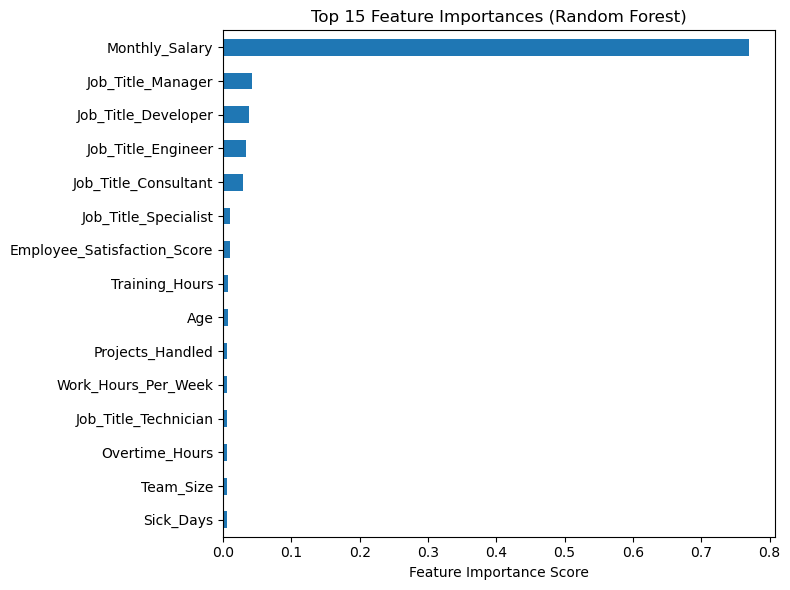

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the trained model
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort and plot the top 15 features
rf_importances.sort_values(ascending=False).head(15).plot(kind='barh', figsize=(8, 6))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Bias/Variance Analysis for Random Forest:

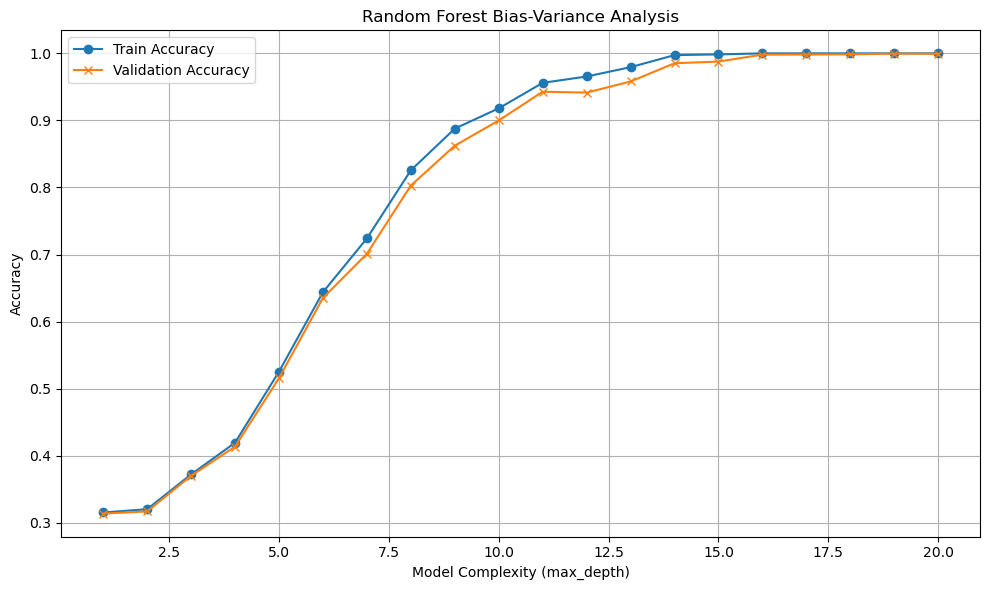

In [12]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Create range of max_depth values to test model complexity
max_depth_values = range(1, 21)
train_accuracies = []
val_accuracies = []

# Loop over each max_depth value
for depth in max_depth_values:
    model = RandomForestClassifier(max_depth=depth, n_estimators=70, random_state=42)
    model.fit(X_train, y_train)

    # Accuracy on training set
    train_acc = model.score(X_train, y_train)
    train_accuracies.append(train_acc)

    # Accuracy on validation (test) set
    val_acc = model.score(X_test, y_test)
    val_accuracies.append(val_acc)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(max_depth_values, val_accuracies, label="Validation Accuracy", marker='x')
plt.title("Random Forest Bias-Variance Analysis")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Confusion Matrix Heatmap (Random Forest)

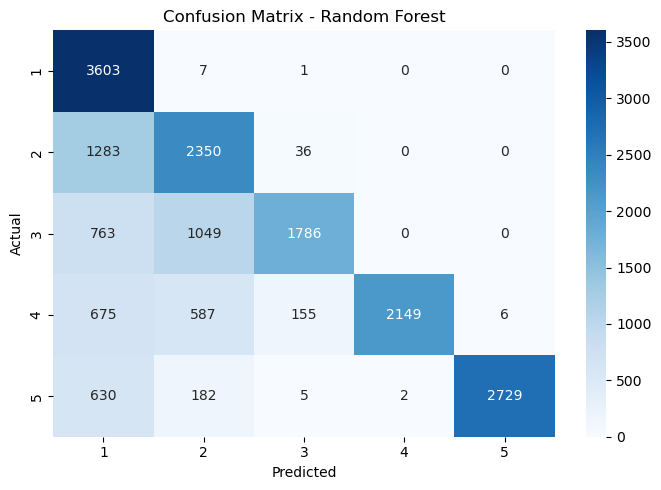

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create the confusion matrix again
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=rf_model.classes_, 
            yticklabels=rf_model.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Cross-Validation for our Random Forest Model

In [14]:
from sklearn.model_selection import cross_val_score

# Run 5-fold cross-validation on the full dataset
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Print results
print("Cross-validation scores (5 folds):", cv_scores)
print("Average CV accuracy:", round(cv_scores.mean(), 4))

Cross-validation scores (5 folds): [0.71185687 0.70763418 0.69379931 0.70718969 0.72469163]
Average CV accuracy: 0.709


Lets train and run XGBoost Classifier to predict our Performance_Score of Employees:

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
xgb_model = XGBClassifier(
    n_estimators=70,
    max_depth=7,               
    learning_rate=0.01,         
    subsample=0.8,             
    colsample_bytree=0.8,      
    reg_lambda=1.0,            
    reg_alpha=0.5,             
    random_state=42,
    eval_metric='mlogloss'
)

# As XGBoost except class levels starts from 0: 
# Map class labels from [1–5] → [0–4]
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# Train the model
xgb_model.fit(X_train, y_train_xgb)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Shift prediction back to original labels
y_pred_original = y_pred + 1

# Evaluate
print("XGBoost Accuracy Score:", accuracy_score(y_test, y_pred_original))
print("\nClassification Report:\n", classification_report(y_test, y_pred_original))

XGBoost Accuracy Score: 0.9922769196577398

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3611
           2       1.00      1.00      1.00      3669
           3       1.00      1.00      1.00      3598
           4       1.00      0.96      0.98      3572
           5       0.96      1.00      0.98      3548

    accuracy                           0.99     17998
   macro avg       0.99      0.99      0.99     17998
weighted avg       0.99      0.99      0.99     17998



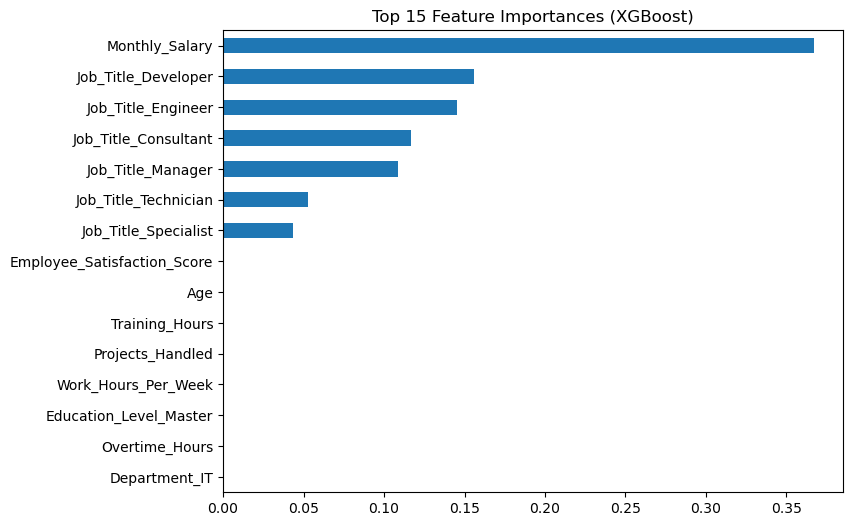

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_importances.sort_values(ascending=False).head(15).plot(kind='barh', figsize=(8, 6))
plt.title("Top 15 Feature Importances (XGBoost)")
plt.gca().invert_yaxis()
plt.show()


Bias/Variance Analysis for XGBoost

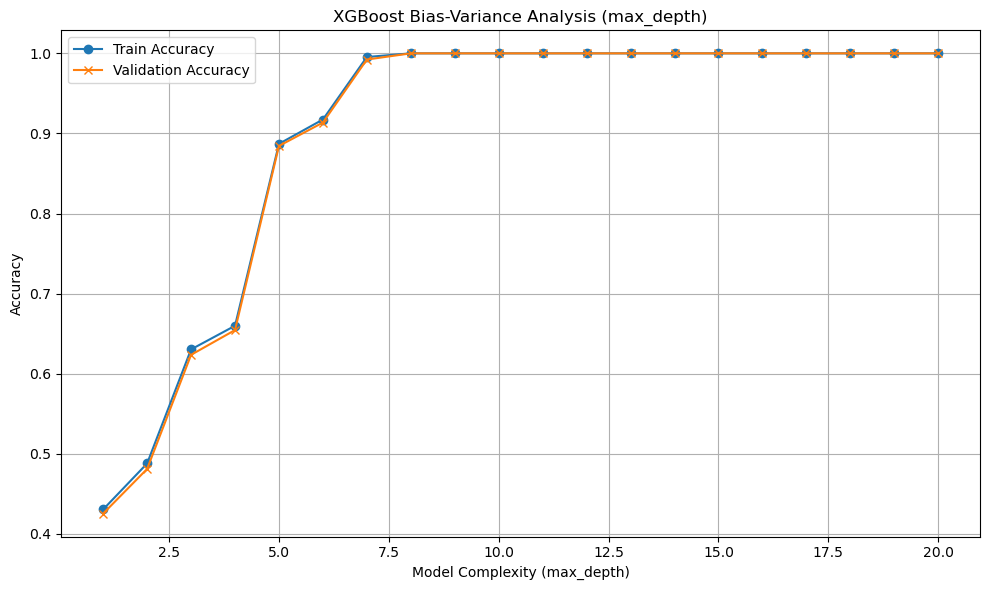

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

train_acc = []
val_acc = []
depths = list(range(1, 21))

for d in depths:
    model = XGBClassifier(
        n_estimators=70,
        max_depth=d,
        learning_rate=0.01,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        reg_alpha=0.5,
        random_state=42,
        eval_metric='mlogloss'
    )
    model.fit(X_train, y_train_xgb)
    train_acc.append(model.score(X_train, y_train_xgb))
    val_acc.append(model.score(X_test, y_test_xgb))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(depths, train_acc, label='Train Accuracy', marker='o')
plt.plot(depths, val_acc, label='Validation Accuracy', marker='x')
plt.title("XGBoost Bias-Variance Analysis (max_depth)")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Confusion Matrix Heatmap (XGBoost)

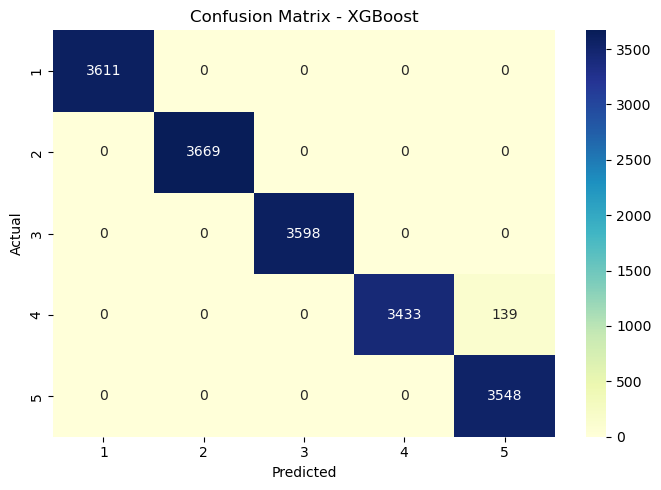

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix (already adjusted back to original labels)
cm_xgb = confusion_matrix(y_test, y_pred_original)

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=xgb_model.classes_ + 1,
            yticklabels=xgb_model.classes_ + 1)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Cross-Validation for XGBoost

In [19]:
from sklearn.model_selection import cross_val_score

# Re-initialize XGBoost with same settings
xgb_cv_model = XGBClassifier(
    n_estimators=70,
    max_depth=7,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    reg_alpha=0.5,
    random_state=42,
    eval_metric='mlogloss'
)

# Perform 5-fold cross-validation on encoded full dataset
cv_scores_xgb = cross_val_score(xgb_cv_model, X, y - 1, cv=5)  # Subtract 1 for class labels

# Print results
print("XGBoost Cross-validation scores (5 folds):", cv_scores_xgb)
print("Average CV accuracy:", round(cv_scores_xgb.mean(), 4))

XGBoost Cross-validation scores (5 folds): [0.99983331 0.99544394 1.         0.99983331 0.99938882]
Average CV accuracy: 0.9989
